# Given

2 datasets - one for Regression task, and another for Classification task

# Find 

Within SKLearn generate polynoms and find the best fitting model. For Tensorflow assess 3 different networks and pick the best fist.
Compare both.

While doing that:

* split train into train, cross_validation, test - 60%/20%/20%
* create multiple models
    * sklearn linear regression
    * sklearn polynomial regression
    * tensorflow regression
* assess cross validation accuracy
* pick the configuration with the lowest cv loss
* assess accuracy on a test set
* comparison mean squared error for

# Solution

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score

import tensorflow as tf

### SKLearn Linear regression

In [66]:
data = np.loadtxt("./Lab7_RegressionData.csv", delimiter=",")
x = data[:,0]
y = data[:,1]
x.shape, y.shape

((50,), (50,))

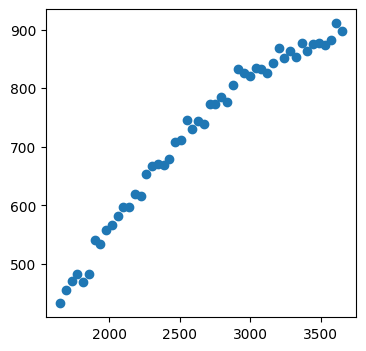

In [67]:
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(x,y)

Split to Train - Test - Validation sets

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42) # 60%/40%
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=42) # 40% -> 50%/50%

x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_val.shape, y_val.shape

((30,), (30,), (10,), (10,), (10,), (10,))

Scale feature

In [69]:
regr_scaler = StandardScaler()
x_train_scaled = regr_scaler.fit_transform(x_train.reshape(-1,1))
x_test_scaled = regr_scaler.transform(x_test.reshape(-1,1))
x_val_scaled = regr_scaler.transform(x_val.reshape(-1,1))

##### Model

In [70]:
LinearModel = LinearRegression()
LinearModel.fit(x_train_scaled, y_train)
print(f"Weights: {LinearModel.coef_}, bias: {LinearModel.intercept_}")

Weights: [137.65658362], bias: 714.4873215937363


Loss calculated according Lab1 in previous course: 

$$Loss_i(w,b) = f_{w,b}(x_{i}) - y_{i}$$
$$J(w,b) = \frac{1}{2m}\sum\limits^{m} Loss_i(w,b)^2$$

In [71]:
prediction = LinearModel.predict(x_train_scaled)
cost = np.mean((y_train - prediction)**2) / 2
print(f"Train cost = {cost}, mean squared error = {mean_squared_error(y_train, prediction) / 2}")

prediction = LinearModel.predict(x_val_scaled)
cost = np.mean((y_val - prediction)**2) / 2
print(f"Validation cost = {cost}, mean squared error = {mean_squared_error(y_val, prediction) / 2}")

Train cost = 424.2500669321093, mean squared error = 424.2500669321093
Validation cost = 209.78616333563227, mean squared error = 209.78616333563227


##### Score

In [72]:
prediction = LinearModel.predict(x_test_scaled)
print(f"Test cost = {mean_squared_error(y_test, prediction) / 2}")

Test cost = 840.6261521733807


### SKLearn Linear Regression (polynom)

$$
\begin{align*}
1. f_{w,b}(\vec{x}) &= w_1 \cdot x + b \\
2. f_{w,b}(\vec{x}) &= w_1 \cdot x + w_2 \cdot x^2 + b \\
4. f_{w,b}(\vec{x}) &= w_1 \cdot x + w_2 \cdot x^2 + w_3 \cdot x^3 + b \\
5. f_{w,b}(\vec{x}) &= w_1 \cdot x + w_2 \cdot x^2 + w_3 \cdot x^3 + w_4 \cdot x^4 + b \\
&\cdots \\
10. f_{w,b}(x) &= w_1 \cdot x + w_2 \cdot x^2 + \cdots + w_{10} \cdot x^{10} + b \\
\end{align*}
$$


##### Find best polynom

In [73]:
cost = []

for i in range(10):
    
    polynom = PolynomialFeatures(degree=i)
    x_train_poly = polynom.fit_transform(x_train_scaled)
    x_val_poly = polynom.transform(x_val_scaled)

    LinearModel = LinearRegression()
    LinearModel.fit(x_train_poly, y_train)

    prediction_train = LinearModel.predict(x_train_poly)
    prediction_val = LinearModel.predict(x_val_poly)

    train_ith_cost = mean_squared_error(y_train, prediction_train) / 2
    val_ith_cost = mean_squared_error(y_val, prediction_val) / 2

    cost.append([i, train_ith_cost, val_ith_cost])

cost = np.array(cost[1:])

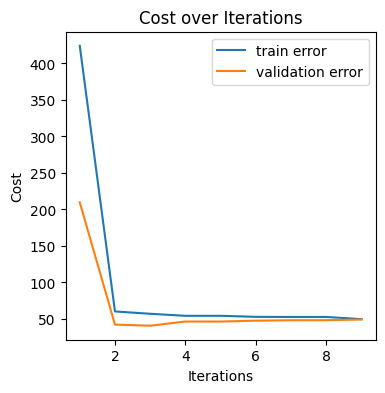

In [74]:
fig, ax = plt.subplots(figsize=(4,4))
ax.plot(cost[:,0], cost[:,1], label="train error")
ax.plot(cost[:,0], cost[:,2], label = "validation error")
ax.set_title("Cost over Iterations")
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
ax.legend()

##### Score

SKLearn Linear Regression - polynom 2 Train cost = 60.35540850073163
SKLearn Linear Regression - polynom 2 Validation cost = 42.34445469075807
SKLearn Linear Regression - polynom 2 Test cost = 94.00712051107176


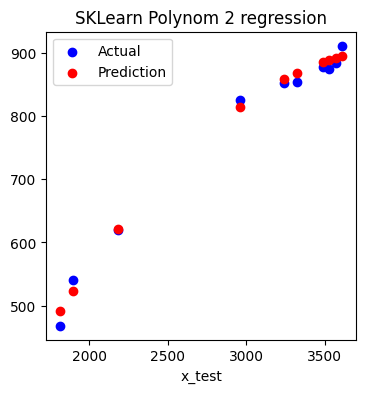

In [75]:
best_polynom = 2

polynom = PolynomialFeatures(best_polynom, include_bias=False)
x_train_scaled_polynom = polynom.fit_transform(x_train_scaled, y_train)
x_val_scaled_polynom = polynom.transform(x_val_scaled)
x_test_scaled_polynom = polynom.transform(x_test_scaled)

model = LinearRegression()
model.fit(x_train_scaled_polynom, y_train)

prediction = model.predict(x_train_scaled_polynom)

cost = mean_squared_error(y_train, prediction) / 2
print(f"SKLearn Linear Regression - polynom {best_polynom} Train cost = {cost}")


prediction = model.predict(x_val_scaled_polynom)

cost = mean_squared_error(y_val, prediction) / 2
print(f"SKLearn Linear Regression - polynom {best_polynom} Validation cost = {cost}")

prediction = model.predict(x_test_scaled_polynom)

cost = mean_squared_error(y_test, prediction) / 2
print(f"SKLearn Linear Regression - polynom {best_polynom} Test cost = {cost}")

fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(x_test, y_test, c='b', label="Actual")
ax.scatter(x_test, prediction, c='r', label="Prediction")
ax.set_title(f"SKLearn Polynom {best_polynom} regression")
ax.set_xlabel("x_test")
ax.legend()

### Tensorflow Regression

Assess these 3 compositions:

<img src='images/Lab7_NN_compositions.png' width=300 height=300>

In [76]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=25, activation="relu", input_dim=2, name="L1"),
    tf.keras.layers.Dense(units=15, activation="relu", name="L2"),
    tf.keras.layers.Dense(units=1, activation="linear", name="L_out"),
])

model1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 25)                75        


                                                                 
 L2 (Dense)                  (None, 15)                390       
                                                                 
 L_out (Dense)               (None, 1)                 16        
                                                                 
Total params: 481 (1.88 KB)
Trainable params: 481 (1.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [77]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=20, activation="relu", input_dim=2, name="L1"),
    tf.keras.layers.Dense(units=12, activation="relu", name="L2"),
    tf.keras.layers.Dense(units=12, activation="relu", name="L3"),
    tf.keras.layers.Dense(units=20, activation="relu", name="L4"),
    tf.keras.layers.Dense(units=12, activation="relu", name="L5"),
    tf.keras.layers.Dense(units=1, activation="linear", name="L_out"),
])

model2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 20)                60        
                                                                 
 L2 (Dense)                  (None, 12)                252       
                                                                 
 L3 (Dense)                  (None, 12)                156       
                                                                 
 L4 (Dense)                  (None, 20)                260       
                                                                 
 L5 (Dense)                  (None, 12)                252       
                                                                 
 L_out (Dense)               (None, 1)                 13        
                                                                 
Total params: 993 (3.88 KB)
Trainable params: 993 (3.8

In [78]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=32, activation="relu", input_dim=2, name="L1"),
    tf.keras.layers.Dense(units=16, activation="relu", name="L2"),
    tf.keras.layers.Dense(units=8, activation="relu", name="L3"),
    tf.keras.layers.Dense(units=4, activation="relu", name="L4"),
    tf.keras.layers.Dense(units=1, activation="linear", name="L_out"),
])

model3.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 32)                96        
                                                                 
 L2 (Dense)                  (None, 16)                528       
                                                                 
 L3 (Dense)                  (None, 8)                 136       
                                                                 
 L4 (Dense)                  (None, 4)                 36        
                                                                 
 L_out (Dense)               (None, 1)                 5         
                                                                 
Total params: 801 (3.13 KB)
Trainable params: 801 (3.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##### Prediction

In [88]:
models = [model1, model2, model3]
accuracy = []


for model in models:

    model.compile(
        optimizer=tf.optimizers.Adam(learning_rate=0.1),
        loss=tf.losses.mean_squared_error
    )

    model.fit(x_train_scaled_polynom, y=y_train,
              epochs=300,
              verbose=0)
    
    prediction = model.predict(x_train_scaled_polynom)

    accuracy.append(mean_squared_error(prediction, y_train) / 2)

accuracy


1/1 [==============================] - 0s 133ms/step


[50.35193034118878, 53.93097898584294, 48.06277241697817]

##### Score

1/1 [==============================] - 0s 77ms/step


TF model best fist was for model#3 Validation cost = 50.39595910356534
1/1 [==============================] - 0s 59ms/step
TF model best fist was for model#3 Test cost = 89.67086605810506


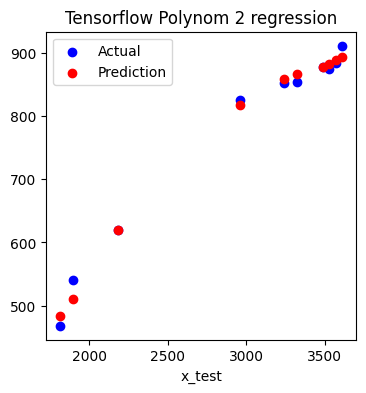

In [89]:
best_model_id = np.argmin(accuracy)
best_model = models[best_model_id]

prediction = best_model.predict(x_val_scaled_polynom)

cost = mean_squared_error(y_val, prediction) / 2
print(f"TF model best fist was for model#{best_model_id+1} Validation cost = {cost}")

prediction = best_model.predict(x_test_scaled_polynom)

cost = mean_squared_error(y_test, prediction) / 2
print(f"TF model best fist was for model#{best_model_id+1} Test cost = {cost}")

fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(x_test, y_test, c='b', label="Actual")
ax.scatter(x_test, prediction, c='r', label="Prediction")
ax.set_title(f"Tensorflow Polynom {best_polynom} regression")
ax.set_xlabel("x_test")
ax.legend()

### SKLearn Classification

In [90]:
data = np.loadtxt("Lab7_ClassificationData.csv", delimiter=",")
x = data[:,0:-1]
y = data[:,2]

x.shape, y.shape

((200, 2), (200,))

Text(0, 0.5, 'x2')

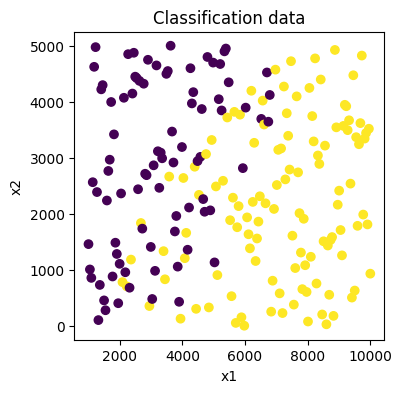

In [91]:
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(x[:,0], x[:,1], c=y)
ax.set_title(f"Classification data")
ax.set_xlabel("x1")
ax.set_ylabel("x2")

##### Train Test Validation split

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=36)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=36)

x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_val.shape, y_val.shape

((120, 2), (120,), (40, 2), (40,), (40, 2), (40,))

##### Scaling features

In [93]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_val_scaled = scaler.transform(x_val)

print(f" Mean for x1_train = {int(np.mean(x_train_scaled[:,0]))}, x1_val = {int(np.mean(x_val_scaled[:,0]))}, x1_test = {int(np.mean(x_test_scaled[:,0]))}")

 Mean for x1_train = 0, x1_val = 0, x1_test = 0


##### Score

In [95]:
LogModel = LogisticRegression()
LogModel.fit(x_train_scaled, y_train)

prediction = LogModel.predict(x_train_scaled)
accuracy = accuracy_score(y_train, prediction)
percentage = accuracy * 100

print("Train accuracy of SK Learn Logistics Model = " + "{:.2f}%".format(percentage))

prediction = LogModel.predict(x_val_scaled)
accuracy = accuracy_score(y_val, prediction)
percentage = accuracy * 100

print("Validation accuracy of SK Learn Logistics Model = " + "{:.2f}%".format(percentage))

prediction = LogModel.predict(x_test_scaled)
accuracy = accuracy_score(y_test, prediction)
percentage = accuracy * 100

print("Test accuracy of SK Learn Logistics Model = " + "{:.2f}%".format(percentage))


Train accuracy of SK Learn Logistics Model = 83.33%
Validation accuracy of SK Learn Logistics Model = 92.50%
Test accuracy of SK Learn Logistics Model = 90.00%


### Tensorflow models

In [97]:
models = [model1, model2, model3]
accuracy = []


for model in models:

    model.compile(
        optimizer=tf.optimizers.Adam(learning_rate=0.01),
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=True)
    )

    model.fit(x_train_scaled, y=y_train,
              epochs=200,
              verbose=0)
    
    prediction = model.predict(x_train_scaled)
    prediction_sigmoid = tf.nn.sigmoid(prediction)
    prediction_binary = prediction_sigmoid>=0.5

    accuracy.append(np.mean(prediction_binary == y_train.reshape(-1,1))*100)


4/4 [==============================] - 0s 4ms/step


In [99]:
for i in range(len(accuracy)):
    print(f"Train acuracy of model {i+1} using Tensorflow classification = "+ "{:.2f}%".format(accuracy[i]))

Train acuracy of model 1 using Tensorflow classification = 87.50%
Train acuracy of model 2 using Tensorflow classification = 60.83%
Train acuracy of model 3 using Tensorflow classification = 60.83%


##### Score

In [100]:
best_model = np.argmax(accuracy)

prediction = models[best_model].predict(x_val_scaled)
prediction_sigmoid = tf.nn.sigmoid(prediction)
prediction_binary = prediction_sigmoid>=0.5
accuracy = np.mean(prediction_binary == y_val.reshape(-1,1))*100

print(f"Validation accuracy of model {best_model} using Tensorflow classification = "+ "{:.2f}%".format(accuracy))

prediction = models[best_model].predict(x_test_scaled)
prediction_sigmoid = tf.nn.sigmoid(prediction)
prediction_binary = prediction_sigmoid>=0.5
accuracy = np.mean(prediction_binary == y_test.reshape(-1,1))*100

print(f"Test accuracy of model {best_model} using Tensorflow classification = "+ "{:.2f}%".format(accuracy))

2/2 [==============================] - 0s 9ms/step
Validation accuracy of model 0 using Tensorflow classification = 85.00%
2/2 [==============================] - 0s 7ms/step
Test accuracy of model 0 using Tensorflow classification = 85.00%


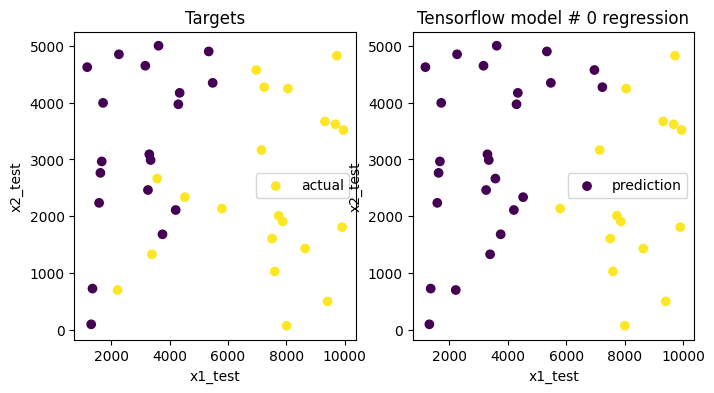

In [101]:
fig, ax = plt.subplots(1, 2, figsize=(8,4))
ax[0].scatter(x_test[:,0], x_test[:,1], c=y_test, label = "actual")
ax[1].scatter(x_test[:,0], x_test[:,1], c=prediction_sigmoid >= 0.5, label = "prediction")
ax[0].set_title(f"Targets")
ax[0].set_xlabel("x1_test")
ax[0].set_ylabel("x2_test")
ax[0].legend()
ax[1].set_title(f"Tensorflow model # {best_model} regression")
ax[1].set_xlabel("x1_test")
ax[1].set_ylabel("x2_test")
ax[1].legend()

# Observations summary


| Type of Task | Model | Method | Comment | Train Cost | Validation MSE | Test MSE |
| --- | --- | --- | --- | --- | --- | --- |
| Regression | SKLearn - Linear Regression | LinearRegression() | | 424.25 | 209.78 | 840.62 |
| Regression | SKLearn - Polynomial Regression | Poly + LinearRegression() | Best fit polynom | 60.35 | 42.34 | 94.00 |
| Regression | Tensorflow - Regression | loss = MSE, optimizer = Adam, epochs = 300 | Best NN | 48.06 | 50.39 | 89.67 |
| Classification | SKLearn - Classification | loss = accuracy() | | 83.33% | 92.50% | 90% |
| Classification | Tensorflow - Bin Classification | loss = BinCrossEntropy, optimizer = Adam, epochs = 200 | Best NN | 87.50% | 85% | 85% |


# Indicators of a good model:

* High train error & high validation error - underfitting
* Low train error & much higher validation error - overfitting
* Low train error & low validation error - good fit